In [142]:
from numpy import *

dataArr = []; labelArr = []
fr = open('testSet.txt')
for line in fr.readlines():
    lineArr = line.strip().split()
    dataArr.append([1.0, float(lineArr[0]), float(lineArr[1])])
    labelArr.append(int(lineArr[2]))

In [168]:
shape(dataArr)

(100, 3)

In [144]:
#sigmoid
def sigmoid(x):
    return 1.00/(1 + exp(-x))

In [145]:
m,n = shape(dataMatrix)
n

3

In [227]:
#gradAscent
dataMatrix = []
labelMatrix = [] 

dataMatrix = mat(dataArr)  
labelMatrix = mat(labelArr).transpose()
m,n = shape(dataMatrix)
alpha = 0.001
maxCycles = 250      
weights = ones((n,1))

for k in range(maxCycles):
    h = sigmoid(dataMatrix*weights) 
    error = (labelMatrix - h)
    weights = weights + alpha * dataMatrix.transpose() * error 

print(weights)


[[ 3.06486267]
 [ 0.38599492]
 [-0.48439698]]


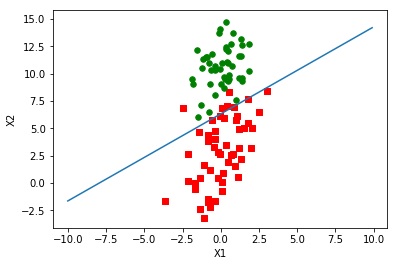

In [235]:
#Decision boundaries

import matplotlib.pyplot as plt
dataArr = array(dataArr)
n = shape(dataArr)[0] 
weight = weights.getA()
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

for i in range(n):
    if int(labelArr[i])== 1:
        xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
    else:
        xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')

#The hypothesis for logistics regression takes the form of:

#hθ=g(z)
#where, g(z) is the sigmoid function and where z is of the form:
#
#z=θ0+θ1x1+θ2x2
#Given we are classifying between 0 and 1, y=1 when hθ≥0.5 which given the sigmoid function is true when:
#
#θ0+θ1x1+θ2x2≥0
#the above is the decision boundary and can be rearranged as:
#
#x2≥−θ0/θ2+−θ1θ2

x = arange(-10.0, 10.0, 0.1)
y = (-weight[0]-weight[1]*x)/weight[2]
ax.plot(x, y)
plt.xlabel('X1'); plt.ylabel('X2');
plt.show()


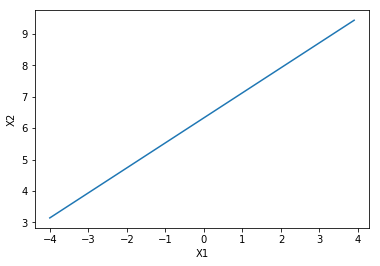

In [313]:
#Ploting a line
x = arange(-4.0, 4.0, 0.1)
y = (-weight[0]-weight[1]*x)/weight[2]
plt.plot(x, y)
plt.xlabel('X1'); plt.ylabel('X2');
plt.show()

In [236]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [239]:
weights=stocGradAscent0(array(dataArr),labelArr)

In [240]:
weights

array([ 1.01702007,  0.85914348, -0.36579921])

In [241]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

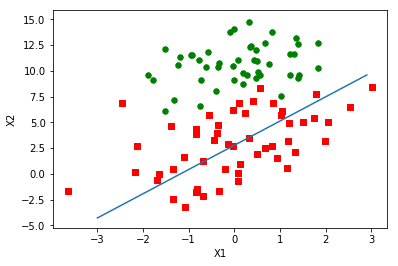

In [242]:
plotBestFit(weights)

In [250]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [314]:
#How fast GradAscent converging got min calasfication train error
dataMatrix = []
labelMatrix = [] 

dataMatrix = mat(dataArr)  
labelMatrix = mat(labelArr).transpose()
m,n = shape(dataMatrix)
alpha = 0.001
maxCycles = 100      
weights = ones((n,1))

winCount = []; 

for k in range(maxCycles):
    
    numRec = 0;
    wCount = 0;
    
    h = sigmoid(dataMatrix*weights) 
    error = (labelMatrix - h)
    weights = weights + alpha * dataMatrix.transpose() * error 
        
    for lineArr in dataArr:
        if classifyVector(lineArr, weights) == labelArr[numRec]:
            wCount += 1;  
        numRec += 1;
    winCount.append(str(wCount))
        
print(','.join(winCount))       


42,51,75,76,78,78,78,78,78,78,78,78,78,78,78,79,80,80,81,81,81,81,82,83,83,83,83,83,83,83,84,84,84,84,84,85,85,85,86,86,86,86,86,86,86,86,86,86,85,85,85,85,86,86,86,86,86,86,86,86,88,88,88,88,88,89,89,89,89,89,89,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
